#Trabajo Práctico N° 1 - Parte 1 - Procesos

Integrantes:


*   Emanuel Rodriguez
*   Ezequiel Catania
* Julian Castellana
* Miguel Ledesma
* Santiago Galo



# Ejercicio 1 - Árbol de procesos con C

Recomendamos CTRL + F9 o "Ejecutar todo" para no tener que ir ejecutando línea por línea.
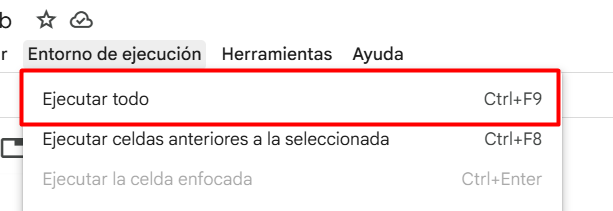

Instalamos lo necesario en nuestra VM prestada por google 😆

In [1]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,715 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,901 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packa

In [2]:
!apt-get install gcc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
gcc is already the newest version (4:11.2.0-1ubuntu1).
gcc set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


Empezamos escribiendo el programa que se va a llamar fork.c. Utilizamos el writefile ya que, como fue explicado en clase, colab detecta solo python automaticamente y para compilarlo, ejecutarlo, necesitaremos guardar en un archivo c

In [3]:
%%writefile fork.c

#include <stdio.h>
#include <stdlib.h>
#include <unistd.h>
#include <sys/wait.h>

#define PROCESS_A 'A'
#define PROCESS_B 'B'
#define PROCESS_C 'C'
#define PROCESS_D 'D'
#define PROCESS_E 'E'
#define PROCESS_F 'F'
#define PROCESS_G 'G'
#define PROCESS_H 'H'
#define PROCESS_I 'I'

#define SLEEP_TIME_10 10
#define SLEEP_TIME_20 20


void error(char letter)
{
    printf("Error de creacion en el proceso %c\n", letter);
    exit(EXIT_FAILURE);
}

void process(char letter)
{
    pid_t pid = getpid();
    pid_t ppid = getppid();
    printf("Proceso %c (PID: %d) (PPID: %d)\n", letter, pid, ppid);

    if (letter == PROCESS_A)
    {
        pid_t b = fork();
        if (b < 0)
        {
            error(PROCESS_B);
        }
        else if (b == 0)
        {
            process(PROCESS_B);
            exit(EXIT_SUCCESS);
        }
        sleep(SLEEP_TIME_20);
        wait(NULL);
    }
    else if (letter == PROCESS_B)
    {
        pid_t c = fork();
        if (c < 0)
        {
            error(PROCESS_C);
        } else if (c == 0)
        {
            process(PROCESS_C);
            sleep(SLEEP_TIME_10);
            exit(EXIT_SUCCESS);
        }

        pid_t d = fork();
        if (d < 0)
        {
            error(PROCESS_D);
        } else if (d == 0)
        {
            process(PROCESS_D);
            sleep(SLEEP_TIME_10);
            exit(EXIT_SUCCESS);
        }

        sleep(SLEEP_TIME_20);
        wait(NULL);
        wait(NULL);
    }
    else if (letter == PROCESS_D)
    {
        pid_t f = fork();
        if (f < 0)
        {
            error(PROCESS_F);
        } else if (f == 0)
        {
            process(PROCESS_F);
            sleep(SLEEP_TIME_10);
            exit(EXIT_SUCCESS);
        }

        pid_t g = fork();
        if (g < 0)
        {
            error(PROCESS_F);
        } else if (g == 0)
        {
            process(PROCESS_F);
            sleep(SLEEP_TIME_10);
            exit(EXIT_SUCCESS);
        }

        sleep(SLEEP_TIME_20);
        wait(NULL);
        wait(NULL);
    }
    else if (letter == PROCESS_C)
    {
        pid_t e = fork();
        if (e < 0)
        {
            error(PROCESS_E);
        } else if (e == 0)
        {
            process(PROCESS_E);
            sleep(SLEEP_TIME_10);
            exit(EXIT_SUCCESS);
        }
        wait(NULL);
    }
    else if (letter == PROCESS_E)
    {
        pid_t h = fork();
        if (h < 0)
        {
            error(PROCESS_H);
        } else if (h == 0)
        {
            process(PROCESS_H);
            sleep(SLEEP_TIME_10);
            exit(EXIT_SUCCESS);
        }

        pid_t i = fork();
        if (i < 0)
        {
            error(PROCESS_I);
        } else if (i == 0)
        {
            process(PROCESS_I);
            sleep(SLEEP_TIME_10);
            exit(EXIT_SUCCESS);
        }

        wait(NULL);
        wait(NULL);
    }
    else
    {
        sleep(10);
    }
}

int main()
{
    process(PROCESS_A);
    return 0;
}


Writing fork.c


Compilamos nuestro archivo c

In [4]:
!gcc -o fork.bin fork.c

Verificamos si están los archivos

In [5]:
!ls

fork.bin  fork.c  sample_data


Luego de compilarlo, vamos a ejecutarlo como daemon en segundo plano. ¿Por qué?
El comadno **nohup** hace que el proceso siga ejecutándose incluso si la terminal se cierra. Sin esto no sería posible evaluarlo.
Si nosotros no pusiéramos el nohup (No Hang UP) no seríamos capaces de evaluar como se van creando los procesos, ya que Google COLAB nos permite solo una terminal

In [6]:
!nohup ./fork.bin 1>salidaC 2>/dev/null &

Guardamos el ID del proceso "A" en un archivo "pid.txt" para luego utilizarlo al llamar a pstree y ver su respectivo árbol de procesos

In [7]:
!pgrep -f fork.bin | head -n 1 > pid.txt

In [8]:
!pid=$(pgrep -f fork.bin | head -n 1) && pstree -p $pid

fork.bin(2146)───fork.bin(2147)─┬─fork.bin(2148)───fork.bin(2150)─┬─fork.bin(2153)
                                │                                 └─fork.bin(2154)
                                └─fork.bin(2149)─┬─fork.bin(2151)
                                                 └─fork.bin(2152)


Este sería el comando que habría que ejecutar, pero no está automatizado y hay que indicarle que sobre que PID queremos ver el árbol de procesos

In [9]:
!pstree -p 2852

# Ejercicio 2

**a.** El código de la imagen simula un juego de dados donde hay 5 jugadores que "lanzan los dados" 10 veces cada uno. Por cada jugador crea un proceso independiente y suma el valor aleatorio de los dados en cada uno de los lanzamientos, imprimiendo al final el puntaje total obtenido por el jugador. Como luego de cada tiro de dados se espera un tiempo aleatorio, el orden en que los jugadores hacen sus lanzamientos no es determinístico.

Por último, el programa espera que finalicen todos los procesos/ jugadores.

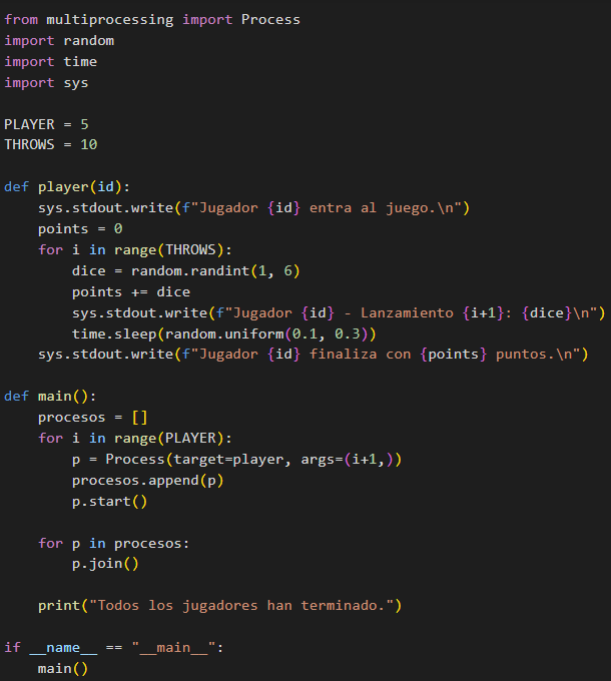

**b.**  A continuación, desarrollamos el mismo programa en Python pero utilizando fork() en vez de Process.

In [10]:
import os
import random
import time
import sys

DICE_MIN_VALUE = 1
DICE_MAX_VALUE = 6
MIN_RANDOM_VALUE = 0.1
MAX_RANDOM_VALUE = 0.3

PLAYER = 5
THROWS = 10

def player(id):
    sys.stdout.write(f"Jugador {id} entra al juego.\n")
    sys.stdout.flush()
    points = 0
    for i in range(THROWS):
        dice = random.randint(DICE_MIN_VALUE, DICE_MAX_VALUE)
        points += dice
        sys.stdout.write(f"Jugador {id} - Lanzamiento {i+1}: {dice}\n")
        sys.stdout.flush()
        time.sleep(random.uniform(MIN_RANDOM_VALUE, MAX_RANDOM_VALUE))
    sys.stdout.write(f"Jugador {id} finaliza con {points} puntos.\n")
    sys.stdout.flush()

def main():
    children = [] #Creamos una lista para todos los procesos hijo

    for i in range(PLAYER):

        #Creamos un nuevo proceso hijo para cada jugador
        pid = os.fork()
        if pid == 0:
            # Es el proceso hijo
            player(i+1)
            os._exit(os.EX_OK)  # Finalizamos el proceso hijo
        else:
            # Es el proceso padre
            children.append(pid)

    # Mediante su pid, esperamos a que todos los hijos terminen
    for pid in children:
        os.waitpid(pid, 0)

    print("Todos los jugadores han terminado.")

if __name__ == "__main__":
    main()


Jugador 1 entra al juego.
Jugador 2 entra al juego.
Jugador 1 - Lanzamiento 1: 6
Jugador 4 entra al juego.
Jugador 3 entra al juego.
Jugador 3 - Lanzamiento 1: 5
Jugador 2 - Lanzamiento 1: 1
Jugador 4 - Lanzamiento 1: 2
Jugador 5 entra al juego.
Jugador 5 - Lanzamiento 1: 3
Jugador 1 - Lanzamiento 2: 3
Jugador 3 - Lanzamiento 2: 6
Jugador 4 - Lanzamiento 2: 3
Jugador 2 - Lanzamiento 2: 5
Jugador 5 - Lanzamiento 2: 4
Jugador 2 - Lanzamiento 3: 6
Jugador 4 - Lanzamiento 3: 3
Jugador 1 - Lanzamiento 3: 3
Jugador 5 - Lanzamiento 3: 2
Jugador 3 - Lanzamiento 3: 1
Jugador 4 - Lanzamiento 4: 4
Jugador 2 - Lanzamiento 4: 4
Jugador 3 - Lanzamiento 4: 3
Jugador 1 - Lanzamiento 4: 3
Jugador 5 - Lanzamiento 4: 3
Jugador 4 - Lanzamiento 5: 1
Jugador 1 - Lanzamiento 5: 3
Jugador 3 - Lanzamiento 5: 5
Jugador 2 - Lanzamiento 5: 2
Jugador 5 - Lanzamiento 5: 1
Jugador 4 - Lanzamiento 6: 6
Jugador 3 - Lanzamiento 6: 5
Jugador 1 - Lanzamiento 6: 2
Jugador 5 - Lanzamiento 6: 4
Jugador 4 - Lanzamiento 7: 3


# Ejercicio 3

Primero descargamos las dependencias necesarias para compilar Java

In [11]:
!apt update
!apt install default-jdk -y


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,211 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [4,436 kB]
Fetched 7,902 kB in 3s (2,317 kB/s)
Reading package lists... Done
Building dependency tree... D

Una vez descargado todo, creamos el directorio de trabajo

In [12]:
!mkdir -p PrograConcu

Creamos la clase que va a modelar a una CamaraDeVigilancia, la cual recibe como parametros desde el Main.java la duracion, el intervalo entre reportes, la zona que va a vigilar y su ID.

In [13]:
%%writefile PrograConcu/SurveillanceCamera.java
package PrograConcu;

public class SurveillanceCamera {
  public static void main(String[] args) throws InterruptedException {
    int duration = Integer.parseInt(args[0]);
    int interval = Integer.parseInt(args[1]);
    String zone = args[2];
    int cameraId = Integer.parseInt(args[3]);

    long startTime = System.currentTimeMillis();
    long runtime = duration * 1000L;
    int paranormalEvents = 0;

    while (System.currentTimeMillis() - startTime < runtime) {
      int probability = (int) (Math.random() * 10) + 1;

      try {
        if (probability <= 3) {
          System.out.println(
              "Camara: " + cameraId + " Zona: " + zone + " Evento: Sin actividad");
        } else if (probability <= 5) {
          System.out.println(
              "Camara: " + cameraId + " Zona: " + zone + " Evento: Movimiento detectado");
          paranormalEvents++;
        } else if (probability <= 7) {
          System.out.println(
              "Camara: " + cameraId + " Zona: " + zone + " Evento: Anomalia termica");
          paranormalEvents++;
        } else if (probability <= 9) {
          System.out.println(
              "Camara: " + cameraId + " Zona: " + zone + " Evento: Ruido detectado");
          paranormalEvents++;
        } else {
          System.out.println(
              "Camara: " + cameraId + " Zona: " + zone + " Evento: Sombra extrania");
          paranormalEvents++;
        }

        Thread.sleep(interval * 1000L);

      } catch (InterruptedException e) {
        System.out.println("Camara interrumpida");
        break;
      }
    }

    System.out.println(
        "La camara " + cameraId + " en la zona " + zone
            + " tuvo " + paranormalEvents + " eventos paranormales");
  }
}

Writing PrograConcu/SurveillanceCamera.java


La clase Main.java sera el proceso principal, por el que ejecutaremos el programa, y le pasaremos los parametros de la duracion y el intervalo entre cada reporte que queremos para las camaras.

Este es el proceso encargado de iniciar las camaras y de luego esperar a su finalizacion.

In [14]:
%%writefile PrograConcu/Main.java
package PrograConcu;

import java.io.IOException;
import java.util.ArrayList;
import java.util.List;

public class Main {
  public static void main(String[] args) throws IOException, InterruptedException {
    int duration = Integer.parseInt(args[0]);
    int interval = Integer.parseInt(args[1]);
    int cameraId = 1;

    String[] zones = {"Sotano", "Atico", "Cocina", "Dormitorio", "Jardin", "Mausoleo"};

    List<Process> processes = new ArrayList<>();

    for (String zone : zones) {
      ProcessBuilder processBuilder =
          new ProcessBuilder(
              "java",
              "PrograConcu.SurveillanceCamera",
              String.valueOf(duration),
              String.valueOf(interval),
              zone,
              String.valueOf(cameraId++));

      processBuilder.inheritIO();
      Process process = processBuilder.start();
      processes.add(process);
    }

    for (Process process : processes) {
      process.waitFor();
    }

    System.out.println("Ha finalizado la vigilancia...");
  }
}

Writing PrograConcu/Main.java


Ahora, compilamos todos los .java del paquete y generamos el .class en PrograConcu/

In [15]:
!javac PrograConcu/*.java

Una vez ya compilado, procedemos a ejecutar el programa, le pasamos como parametro 30 segundos de duracion de la camara, y 5 que reporte cada 5 segundos.

In [16]:

!java PrograConcu.Main 30 5


Camara: 2 Zona: Atico Evento: Anomalia termica
Camara: 1 Zona: Sotano Evento: Sombra extrania
Camara: 6 Zona: Mausoleo Evento: Sin actividad
Camara: 4 Zona: Dormitorio Evento: Anomalia termica
Camara: 5 Zona: Jardin Evento: Sin actividad
Camara: 3 Zona: Cocina Evento: Sin actividad
Camara: 2 Zona: Atico Evento: Sin actividad
Camara: 1 Zona: Sotano Evento: Ruido detectado
Camara: 6 Zona: Mausoleo Evento: Anomalia termica
Camara: 4 Zona: Dormitorio Evento: Anomalia termica
Camara: 5 Zona: Jardin Evento: Movimiento detectado
Camara: 3 Zona: Cocina Evento: Anomalia termica
Camara: 2 Zona: Atico Evento: Sombra extrania
Camara: 1 Zona: Sotano Evento: Sombra extrania
Camara: 6 Zona: Mausoleo Evento: Sin actividad
Camara: 4 Zona: Dormitorio Evento: Sombra extrania
Camara: 5 Zona: Jardin Evento: Sombra extrania
Camara: 3 Zona: Cocina Evento: Anomalia termica
Camara: 2 Zona: Atico Evento: Sin actividad
Camara: 1 Zona: Sotano Evento: Sombra extrania
Camara: 6 Zona: Mausoleo Evento: Movimiento det